<a href="https://colab.research.google.com/github/Pkodeboy/64061_AML/blob/main/Assignment%203/Assignment_3_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep learning for timeseries**


In [ ]:
# Download the jena_climate_2009_2016.csv.zip file from AWS S3
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

# Unzip the jena_climate_2009_2016.csv.zip file
!unzip jena_climate_2009_2016.csv.zip


--2023-11-24 00:28:03--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.171.96, 52.216.37.96, 16.182.43.16, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.171.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip.2’

jena_climate_2009_2 100%[===================>]  12.94M  15.1MB/s    in 0.9s    

2023-11-24 00:28:04 (15.1 MB/s) - ‘jena_climate_2009_2016.csv.zip.2’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
replace jena_climate_2009_2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**Importing the data file**

In [ ]:
#Importing csv
import os
fname = os.path.join("jena_climate_2009_2016.csv")

In [ ]:
#Reading Data from file
with open(fname) as f:
    data = f.read()

In [ ]:
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Split the data into lines
lines = data.split("\n")
# Get the header row
header = lines[0].split(",")
# Remove the header row from the list of lines
lines = lines[1:]
# Print the header row
print(header)
# Print the number of lines in the data
print(len(lines))


['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


**Parsing the data**

In [ ]:
import numpy as np

# Create a NumPy array to store the temperature data
temperature = np.zeros((len(lines),))

# Create a NumPy array to store the raw data
raw_data = np.zeros((len(lines), len(header) - 1))

# Iterate over the lines in the data
for i, line in enumerate(lines):

    # Split the line into a list of values
    values = [float(x) for x in line.split(",")[1:]]

    # Store the temperature in the temperature array
    temperature[i] = values[1]

    # Store the raw data in the raw_data array
    raw_data[i, :] = values[:]


In [ ]:
temperature[:5]

array([-8.02, -8.41, -8.51, -8.31, -8.27])

In [ ]:
view = pd.DataFrame(temperature)
view.describe()

,0
count,420451.000000
mean,9.448567
std,8.423685
min,-23.010000
25%,3.360000
50%,9.410000
75%,15.470000
max,37.280000


**Plotting the temperature timeseries**

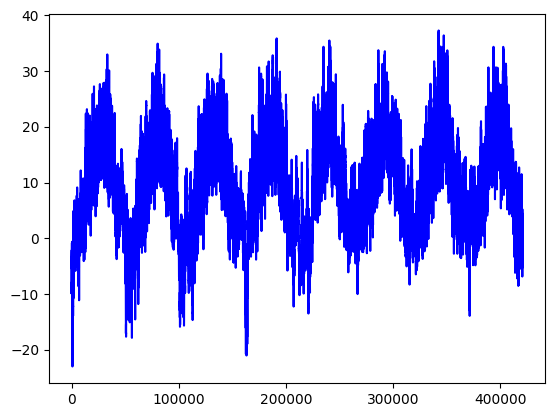

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(temperature)), temperature, color='blue')



**Plotting the first 15 days of the temperature timeseries**

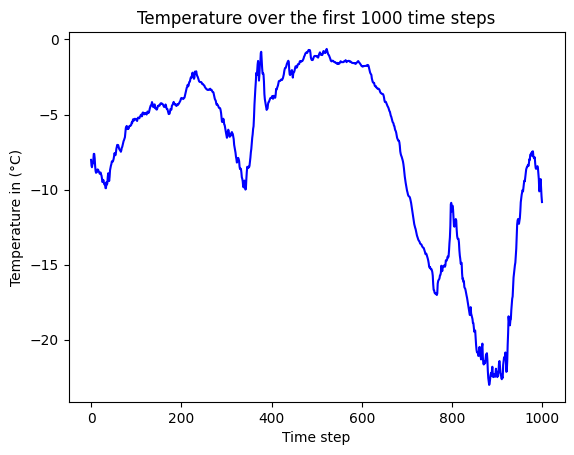

In [ ]:
## Plot the first 1000 temperature values
plt.plot(range(1000), temperature[:1000], color='blue')
# Set the x-axis label
plt.xlabel("Time step")

# Set the y-axis label
plt.ylabel("Temperature in (°C)")

# Set the title of the plot
plt.title("Temperature over the first 1000 time steps")

# Display the plot
plt.show()


**Computing the number of samples we'll use for each data split**

In [ ]:
# Split the data into train, validation, and test sets
num_train_samples = int(0.5 * len(raw_data))  # 50% of the data for training
num_val_samples = int(0.25 * len(raw_data))  # 25% of the data for validation
num_test_samples = len(raw_data) - num_train_samples - num_val_samples  # The remaining 25% of the data for testing


**Preparing the data
Normalizing the data**

In [ ]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)
for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


In [ ]:
#Instantiating datasets for training, validation, and testing
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

In [ ]:
train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],  # The input data
    targets=temperature[delay:],  # The target data
    sampling_rate=sampling_rate,  # The sampling rate
    sequence_length=sequence_length,  # The length of the sequences
    shuffle=True,  # Whether to shuffle the data
    batch_size=batch_size,  # The batch size
    start_index=0,  # The start index
    end_index=num_train_samples)  # The end index


In [ ]:
val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],  # The input data
    targets=temperature[delay:],  # The target data
    sampling_rate=sampling_rate,  # The sampling rate
    sequence_length=sequence_length,  # The length of the sequences
    shuffle=True,  # Whether to shuffle the data
    batch_size=batch_size,  # The batch size
    start_index=num_train_samples,  # The start index
    end_index=num_train_samples + num_val_samples)  # The end index


In [ ]:
test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],  # The input data
    targets=temperature[delay:],  # The target data
    sampling_rate=sampling_rate,  # The sampling rate
    sequence_length=sequence_length,  # The length of the sequences
    shuffle=True,  # Whether to shuffle the data
    batch_size=batch_size,  # The batch size
    start_index=num_train_samples + num_val_samples,  # The start index
    # Set the end index to None so that the dataset will contain all of the remaining samples.
    end_index=None)


In [ ]:
# Iterate over the first sample in the train dataset
for samples, targets in train_dataset:
    # Print the shape of the samples and targets
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)

    # Break out of the loop after the first iteration
    break


samples shape: (256, 120, 14)
targets shape: (256,)


**common-sense, non-machine-learning baseline**

In [ ]:

#Computing the common-sense baseline MAE
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen
print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 2.44
Test MAE: 2.62


In [ ]:
from tensorflow import keras
from keras import layers

**Training and evaluating a densely connected model**

In [ ]:
#Training and evaluating a densely connected model
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.st",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.st")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 14s 17ms/step - loss: 11.9813 - mae: 2.6783 - val_loss: 9.8949 - val_mae: 2.4810
Epoch 2/10
819/819 [==============================] - 14s 16ms/step - loss: 8.7613 - mae: 2.3259 - val_loss: 10.8740 - val_mae: 2.5914
Epoch 3/10
819/819 [==============================] - 13s 16ms/step - loss: 8.1248 - mae: 2.2409 - val_loss: 14.1030 - val_mae: 2.9708
Epoch 4/10
819/819 [==============================] - 13s 16ms/step - loss: 7.7150 - mae: 2.1846 - val_loss: 11.8487 - val_mae: 2.7312
Epoch 5/10
819/819 [==============================] - 13s 16ms/step - loss: 7.4537 - mae: 2.1501 - val_loss: 11.3608 - val_mae: 2.6682
Epoch 6/10
819/819 [==============================] - 13s 16ms/step - loss: 7.2070 - mae: 2.1144 - val_loss: 10.7403 - val_mae: 2.5930
Epoch 7/10
819/819 [==============================] - 13s 16ms/step - loss: 6.9889 - mae: 2.0831 - val_loss: 10.6027 - val_mae: 2.5757
Epoch 8/10
819/819 [==============================] - 1

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 flatten_1 (Flatten)         (None, 1680)              0         
                                                                 
 dense_2 (Dense)             (None, 16)                26896     
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 26913 (105.13 KB)
Trainable params: 26913 (105.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


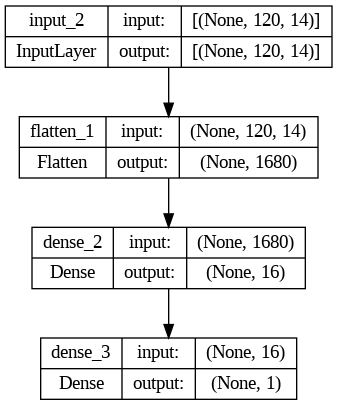

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

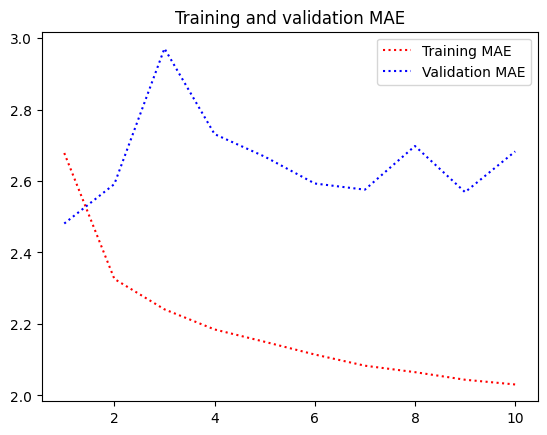

In [ ]:

import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()

# Update the color to red and line style to a dotted line for training MAE
plt.plot(epochs, loss, "r:", label="Training MAE")

# Update the color to blue and line style to a dotted line for validation MAE
plt.plot(epochs, val_loss, "b:", label="Validation MAE")

plt.title("Training and validation MAE")
plt.legend()
plt.show()


**1D Convolution model with 10 epoch**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.st",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_conv.st")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 21s 18ms/step - loss: 21.7295 - mae: 3.6704 - val_loss: 15.6582 - val_mae: 3.1156
Epoch 2/10
819/819 [==============================] - 15s 18ms/step - loss: 15.2788 - mae: 3.1100 - val_loss: 15.4461 - val_mae: 3.1127
Epoch 3/10
819/819 [==============================] - 15s 18ms/step - loss: 13.7839 - mae: 2.9517 - val_loss: 14.3532 - val_mae: 2.9706
Epoch 4/10
819/819 [==============================] - 15s 18ms/step - loss: 12.9439 - mae: 2.8576 - val_loss: 16.1776 - val_mae: 3.1675
Epoch 5/10
819/819 [==============================] - 16s 19ms/step - loss: 12.2771 - mae: 2.7796 - val_loss: 13.5609 - val_mae: 2.8821
Epoch 6/10
819/819 [==============================] - 15s 18ms/step - loss: 11.7455 - mae: 2.7177 - val_loss: 14.2841 - val_mae: 2.9573
Epoch 7/10
819/819 [==============================] - 15s 18ms/step - loss: 11.3068 - mae: 2.6694 - val_loss: 14.6500 - val_mae: 3.0122
Epoch 8/10
819/819 [============================

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 conv1d (Conv1D)             (None, 97, 8)             2696      
                                                                 
 max_pooling1d (MaxPooling1  (None, 48, 8)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 8)             776       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 18, 8)             0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 8)             392 

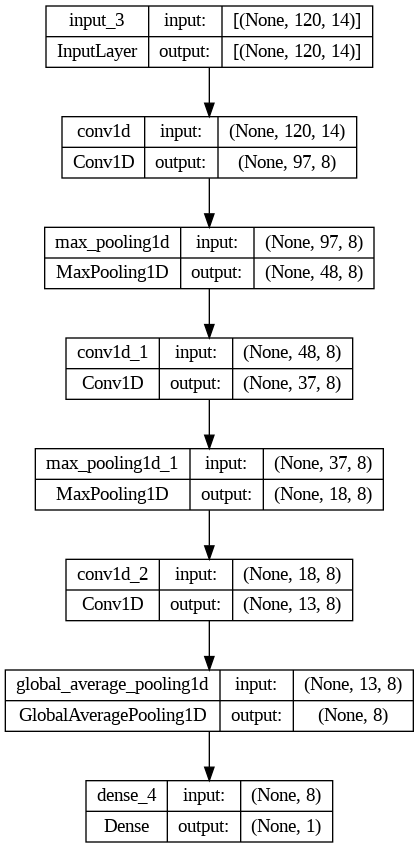

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

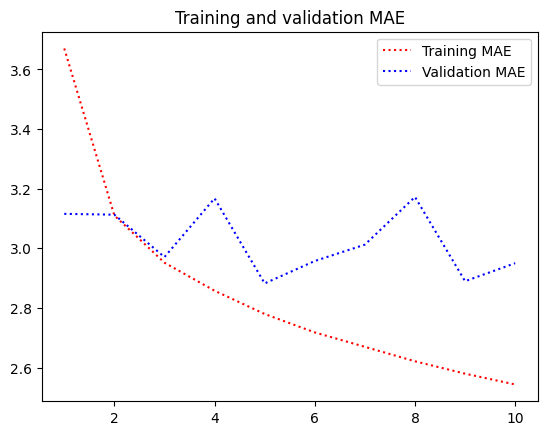

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()

# Update the color to red and line style to a dotted line for training MAE
plt.plot(epochs, loss, "r:", label="Training MAE")

# Update the color to blue and line style to a dotted line for validation MAE
plt.plot(epochs, val_loss, "b:", label="Validation MAE")

plt.title("Training and validation MAE")
plt.legend()
plt.show()

**The training and validation losses are decreasing over time, which suggests that the model is learning.
The validation loss is slightly higher than the training loss, which is normal. It is important to monitor the validation loss to make sure that the model is not overfitting the training data.
The test MAE is somewhat higher than the validation MAE, which suggests that the model is not generalizing perfectly to unseen data. This could be due to a number of factors, such as noise in the data or the model being undertrained.**


**A Simple RNN**

In [ ]:
num_features = 14
inputs = keras.Input(shape=(None, num_features))
outputs = layers.SimpleRNN(16)(inputs)

model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_SimRNN.st",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_SimRNN.st")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 51s 60ms/step - loss: 138.8274 - mae: 9.7038 - val_loss: 144.0358 - val_mae: 9.9108
Epoch 2/10
819/819 [==============================] - 49s 60ms/step - loss: 136.4226 - mae: 9.5642 - val_loss: 143.7471 - val_mae: 9.8792
Epoch 3/10
819/819 [==============================] - 49s 59ms/step - loss: 136.2359 - mae: 9.5457 - val_loss: 143.5905 - val_mae: 9.8558
Epoch 4/10
819/819 [==============================] - 49s 59ms/step - loss: 136.1817 - mae: 9.5384 - val_loss: 143.5422 - val_mae: 9.8509
Epoch 5/10
819/819 [==============================] - 47s 58ms/step - loss: 136.1649 - mae: 9.5379 - val_loss: 143.5548 - val_mae: 9.8523
Epoch 6/10
819/819 [==============================] - 49s 59ms/step - loss: 136.1355 - mae: 9.5341 - val_loss: 143.5247 - val_mae: 9.8491
Epoch 7/10
819/819 [==============================] - 50s 61ms/step - loss: 136.1165 - mae: 9.5317 - val_loss: 143.5216 - val_mae: 9.8485
Epoch 8/10
819/819 [==============

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, 14)]        0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                496       
                                                                 
Total params: 496 (1.94 KB)
Trainable params: 496 (1.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


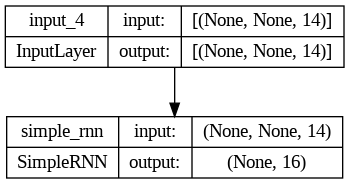

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

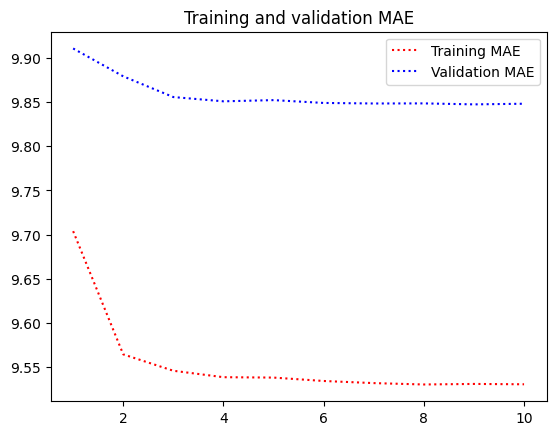

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()

# Update the color to red and line style to a dotted line for training MAE
plt.plot(epochs, loss, "r:", label="Training MAE")

# Update the color to blue and line style to a dotted line for validation MAE
plt.plot(epochs, val_loss, "b:", label="Validation MAE")

plt.title("Training and validation MAE")
plt.legend()
plt.show()

**After 2 epochs the model has stopped learning as the MAE is a constant line and converged to a certain level of performance, and further training does not lead to significant improvement, the solution for the above is to experiment with increasing or decreasing the model complexity. We can add more layers, increase the number of units in existing layers, or try different architectures.Trying to add more layers in the data set by stacking the RNN's**

**Simple RNN - Stacking RNN layers**

In [ ]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_SRNN2.st",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_SRNN2.st")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 194s 235ms/step - loss: 136.8361 - mae: 9.5696 - val_loss: 143.4968 - val_mae: 9.8459
Epoch 2/10
819/819 [==============================] - 191s 234ms/step - loss: 135.9485 - mae: 9.5135 - val_loss: 143.4600 - val_mae: 9.8413
Epoch 3/10
819/819 [==============================] - 190s 232ms/step - loss: 135.9036 - mae: 9.5074 - val_loss: 143.3759 - val_mae: 9.8314
Epoch 4/10
819/819 [==============================] - 186s 227ms/step - loss: 135.8748 - mae: 9.5032 - val_loss: 143.4701 - val_mae: 9.8438
Epoch 5/10
819/819 [==============================] - 188s 230ms/step - loss: 135.8557 - mae: 9.5000 - val_loss: 143.4309 - val_mae: 9.8403
Epoch 6/10
819/819 [==============================] - 186s 227ms/step - loss: 135.8430 - mae: 9.4980 - val_loss: 143.4022 - val_mae: 9.8341
Epoch 7/10
819/819 [==============================] - 186s 227ms/step - loss: 135.8270 - mae: 9.4948 - val_loss: 143.4218 - val_mae: 9.8378
Epoch 8/10
819/819 [

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 120, 16)           496       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 120, 16)           528       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 16)                528       
                                                                 
Total params: 1552 (6.06 KB)
Trainable params: 1552 (6.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


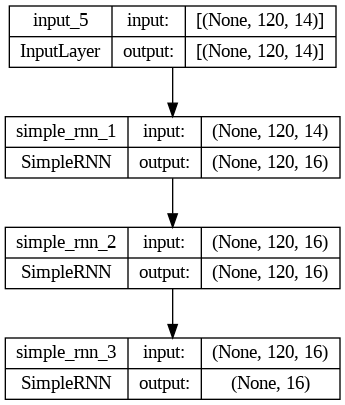

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

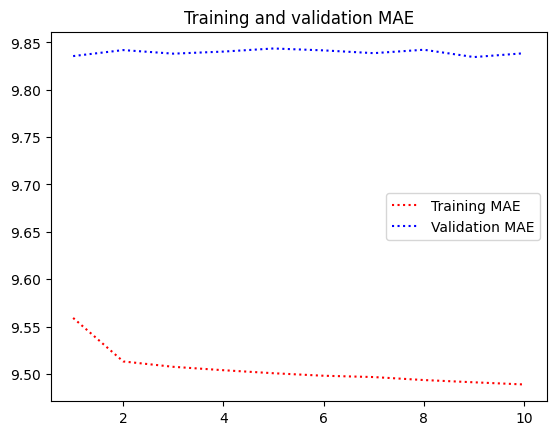

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()

# Update the color to red and line style to a dotted line for training MAE
plt.plot(epochs, loss, "r:", label="Training MAE")

# Update the color to blue and line style to a dotted line for validation MAE
plt.plot(epochs, val_loss, "b:", label="Validation MAE")

plt.title("Training and validation MAE")
plt.legend()
plt.show()

**The Traing and Validation MAE seems to be a constant line which indicates that the model is unable to capture the underlying patterns in the data**

**Simple GRU (Gated Recurrent Unit)**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_gru.st",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_gru.st")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 19s 20ms/step - loss: 44.2889 - mae: 4.8243 - val_loss: 13.2242 - val_mae: 2.7194
Epoch 2/10
819/819 [==============================] - 17s 21ms/step - loss: 10.7216 - mae: 2.5449 - val_loss: 9.6519 - val_mae: 2.3862
Epoch 3/10
819/819 [==============================] - 14s 17ms/step - loss: 9.4775 - mae: 2.4042 - val_loss: 9.9991 - val_mae: 2.4041
Epoch 4/10
819/819 [==============================] - 14s 17ms/step - loss: 9.1699 - mae: 2.3630 - val_loss: 10.1835 - val_mae: 2.4251
Epoch 5/10
819/819 [==============================] - 16s 20ms/step - loss: 8.9668 - mae: 2.3368 - val_loss: 9.6481 - val_mae: 2.3947
Epoch 6/10
819/819 [==============================] - 14s 17ms/step - loss: 8.7911 - mae: 2.3151 - val_loss: 10.4191 - val_mae: 2.4625
Epoch 7/10
819/819 [==============================] - 14s 17ms/step - loss: 8.6311 - mae: 2.2954 - val_loss: 9.8421 - val_mae: 2.4117
Epoch 8/10
819/819 [==============================] - 14s

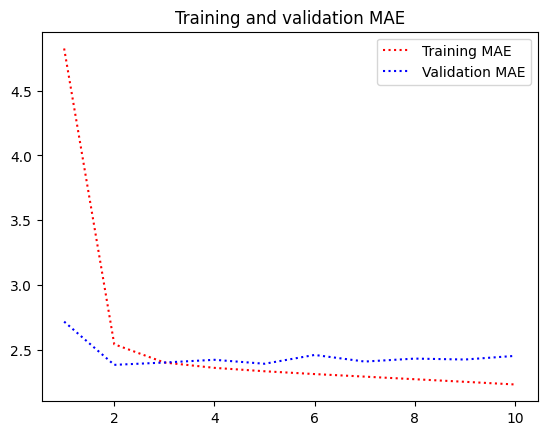

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()

# Update the color to red and line style to a dotted line for training MAE
plt.plot(epochs, loss, "r:", label="Training MAE")

# Update the color to blue and line style to a dotted line for validation MAE
plt.plot(epochs, val_loss, "b:", label="Validation MAE")

plt.title("Training and validation MAE")
plt.legend()
plt.show()

**LSTM-Simple is a simplified version of the Long Short-Term Memory (LSTM) network architecture**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.st",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.st")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 19s 21ms/step - loss: 42.1768 - mae: 4.7223 - val_loss: 12.8490 - val_mae: 2.7225
Epoch 2/10
819/819 [==============================] - 17s 20ms/step - loss: 11.0839 - mae: 2.5847 - val_loss: 9.8680 - val_mae: 2.4432
Epoch 3/10
819/819 [==============================] - 17s 20ms/step - loss: 9.8862 - mae: 2.4512 - val_loss: 9.6550 - val_mae: 2.4077
Epoch 4/10
819/819 [==============================] - 14s 17ms/step - loss: 9.5369 - mae: 2.4038 - val_loss: 9.8043 - val_mae: 2.4166
Epoch 5/10
819/819 [==============================] - 14s 17ms/step - loss: 9.1669 - mae: 2.3561 - val_loss: 9.9850 - val_mae: 2.4297
Epoch 6/10
819/819 [==============================] - 14s 17ms/step - loss: 8.8621 - mae: 2.3152 - val_loss: 9.8065 - val_mae: 2.4134
Epoch 7/10
819/819 [==============================] - 14s 17ms/step - loss: 8.6407 - mae: 2.2852 - val_loss: 10.2751 - val_mae: 2.4736
Epoch 8/10
819/819 [==============================] - 14s 

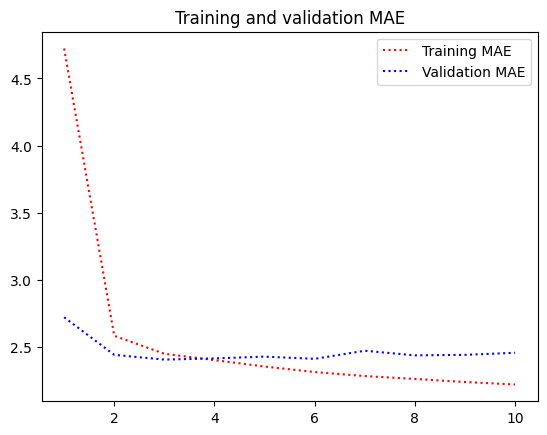

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()

# Update the color to red and line style to a dotted line for training MAE
plt.plot(epochs, loss, "r:", label="Training MAE")

# Update the color to blue and line style to a dotted line for validation MAE
plt.plot(epochs, val_loss, "b:", label="Validation MAE")

plt.title("Training and validation MAE")
plt.legend()
plt.show()

**LSTM (RNN) - dropout Regularization that is widely used for tasks involving sequential data, such as natural language processing and time series analysis. LSTM networks are designed to capture long-term dependencies in data**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.st",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm_dropout.st")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 260s 312ms/step - loss: 46.3123 - mae: 5.0583 - val_loss: 12.9376 - val_mae: 2.7216
Epoch 2/10
819/819 [==============================] - 256s 313ms/step - loss: 19.8572 - mae: 3.4218 - val_loss: 9.6878 - val_mae: 2.4237
Epoch 3/10
819/819 [==============================] - 256s 312ms/step - loss: 18.1382 - mae: 3.2749 - val_loss: 9.5697 - val_mae: 2.4151
Epoch 4/10
819/819 [==============================] - 255s 311ms/step - loss: 17.2252 - mae: 3.1898 - val_loss: 9.6800 - val_mae: 2.4321
Epoch 5/10
819/819 [==============================] - 254s 310ms/step - loss: 16.5955 - mae: 3.1352 - val_loss: 9.3134 - val_mae: 2.3830
Epoch 6/10
819/819 [==============================] - 258s 315ms/step - loss: 16.1308 - mae: 3.0910 - val_loss: 9.2411 - val_mae: 2.3748
Epoch 7/10
819/819 [==============================] - 260s 317ms/step - loss: 15.8244 - mae: 3.0659 - val_loss: 9.2205 - val_mae: 2.3709
Epoch 8/10
819/819 [====================

405/405 [==============================] - 16s 39ms/step - loss: 10.3174 - mae: 2.5142
Test MAE: 2.51


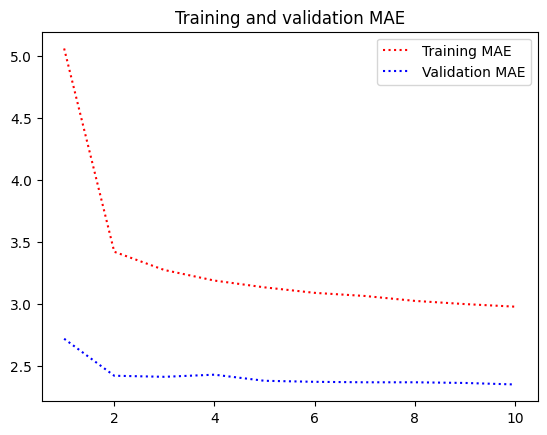

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()

# Update the color to red and line style to a dotted line for training MAE
plt.plot(epochs, loss, "r:", label="Training MAE")

# Update the color to blue and line style to a dotted line for validation MAE
plt.plot(epochs, val_loss, "b:", label="Validation MAE")

plt.title("Training and validation MAE")
plt.legend()
plt.show()

**Stacked LSTM setup involves using multiple LSTM layers stacked on top of each other in a neural network. Each LSTM layer captures different levels of abstraction in the input data, allowing for more powerful modeling of sequential information.**

**8 UNITS**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(8, return_sequences=True)(inputs)
x = layers.LSTM(8)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked1.st",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_LSTM_stacked1.st")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 26s 28ms/step - loss: 76.8934 - mae: 6.7831 - val_loss: 40.7528 - val_mae: 4.7969
Epoch 2/10
819/819 [==============================] - 22s 26ms/step - loss: 24.2807 - mae: 3.6407 - val_loss: 14.2707 - val_mae: 2.8325
Epoch 3/10
819/819 [==============================] - 23s 27ms/step - loss: 11.7765 - mae: 2.6387 - val_loss: 10.1947 - val_mae: 2.4753
Epoch 4/10
819/819 [==============================] - 22s 26ms/step - loss: 9.9413 - mae: 2.4548 - val_loss: 10.1739 - val_mae: 2.4787
Epoch 5/10
819/819 [==============================] - 22s 27ms/step - loss: 9.4259 - mae: 2.3937 - val_loss: 9.7329 - val_mae: 2.4161
Epoch 6/10
819/819 [==============================] - 17s 20ms/step - loss: 9.1349 - mae: 2.3621 - val_loss: 9.9111 - val_mae: 2.4485
Epoch 7/10
819/819 [==============================] - 22s 26ms/step - loss: 8.8899 - mae: 2.3317 - val_loss: 9.7146 - val_mae: 2.4270
Epoch 8/10
819/819 [==============================] - 1

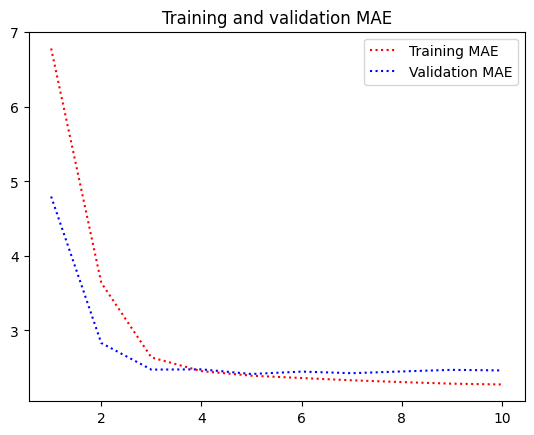

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()

# Update the color to red and line style to a dotted line for training MAE
plt.plot(epochs, loss, "r:", label="Training MAE")

# Update the color to blue and line style to a dotted line for validation MAE
plt.plot(epochs, val_loss, "b:", label="Validation MAE")

plt.title("Training and validation MAE")
plt.legend()
plt.show()

**16 UNITS**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16, return_sequences=True)(inputs)
x = layers.LSTM(16)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked2.st",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_LSTM_stacked2.st")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 26s 28ms/step - loss: 43.0650 - mae: 4.8063 - val_loss: 13.6166 - val_mae: 2.8098
Epoch 2/10
819/819 [==============================] - 22s 27ms/step - loss: 10.8120 - mae: 2.5549 - val_loss: 9.8406 - val_mae: 2.4374
Epoch 3/10
819/819 [==============================] - 23s 28ms/step - loss: 9.2154 - mae: 2.3653 - val_loss: 9.8247 - val_mae: 2.4500
Epoch 4/10
819/819 [==============================] - 17s 21ms/step - loss: 8.5431 - mae: 2.2741 - val_loss: 10.0183 - val_mae: 2.4604
Epoch 5/10
819/819 [==============================] - 17s 21ms/step - loss: 7.9641 - mae: 2.1929 - val_loss: 10.0558 - val_mae: 2.4647
Epoch 6/10
819/819 [==============================] - 17s 20ms/step - loss: 7.3822 - mae: 2.1155 - val_loss: 10.2990 - val_mae: 2.4939
Epoch 7/10
819/819 [==============================] - 17s 20ms/step - loss: 6.9272 - mae: 2.0490 - val_loss: 10.6278 - val_mae: 2.5349
Epoch 8/10
819/819 [==============================] - 1

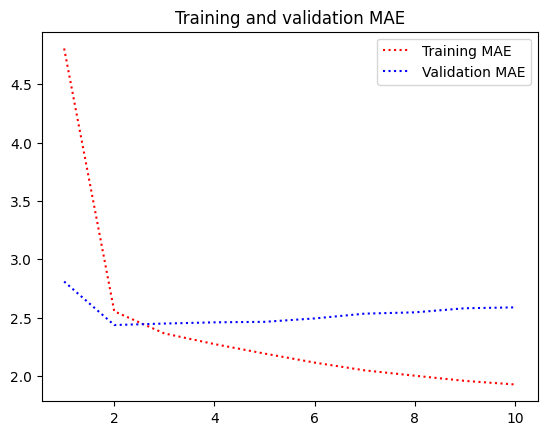

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()

# Update the color to red and line style to a dotted line for training MAE
plt.plot(epochs, loss, "r:", label="Training MAE")

# Update the color to blue and line style to a dotted line for validation MAE
plt.plot(epochs, val_loss, "b:", label="Validation MAE")

plt.title("Training and validation MAE")
plt.legend()
plt.show()

**32 UNITS**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, return_sequences=True)(inputs)
x = layers.LSTM(32)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked3.st",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_LSTM_stacked3.st")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 27s 29ms/step - loss: 22.1696 - mae: 3.3588 - val_loss: 11.0304 - val_mae: 2.5784
Epoch 2/10
819/819 [==============================] - 17s 20ms/step - loss: 7.6973 - mae: 2.1602 - val_loss: 11.5378 - val_mae: 2.6655
Epoch 3/10
819/819 [==============================] - 17s 20ms/step - loss: 6.1526 - mae: 1.9194 - val_loss: 12.6568 - val_mae: 2.7874
Epoch 4/10
819/819 [==============================] - 17s 20ms/step - loss: 5.1965 - mae: 1.7608 - val_loss: 12.7817 - val_mae: 2.8204
Epoch 5/10
819/819 [==============================] - 17s 20ms/step - loss: 4.4673 - mae: 1.6284 - val_loss: 15.0836 - val_mae: 3.0509
Epoch 6/10
819/819 [==============================] - 17s 20ms/step - loss: 3.9577 - mae: 1.5253 - val_loss: 14.4722 - val_mae: 2.9897
Epoch 7/10
819/819 [==============================] - 17s 20ms/step - loss: 3.5458 - mae: 1.4423 - val_loss: 14.1674 - val_mae: 2.9677
Epoch 8/10
819/819 [==============================] - 

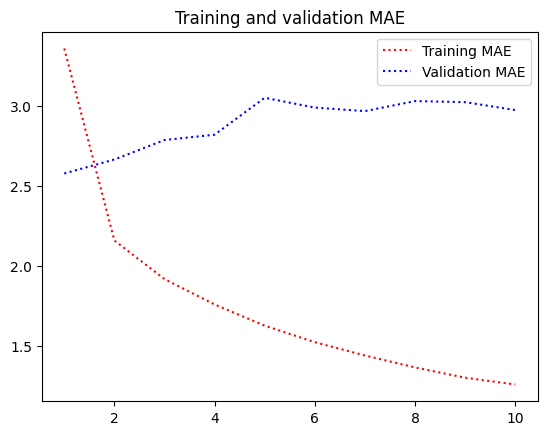

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()

# Update the color to red and line style to a dotted line for training MAE
plt.plot(epochs, loss, "r:", label="Training MAE")

# Update the color to blue and line style to a dotted line for validation MAE
plt.plot(epochs, val_loss, "b:", label="Validation MAE")

plt.title("Training and validation MAE")
plt.legend()
plt.show()

**64 UNITS**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(64, return_sequences=True)(inputs)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked4.st",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_LSTM_stacked4.st")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 27s 30ms/step - loss: 12.6671 - mae: 2.6405 - val_loss: 10.4024 - val_mae: 2.5487
Epoch 2/10
819/819 [==============================] - 17s 21ms/step - loss: 5.0097 - mae: 1.7242 - val_loss: 12.2122 - val_mae: 2.7846
Epoch 3/10
819/819 [==============================] - 18s 21ms/step - loss: 2.9085 - mae: 1.3057 - val_loss: 13.4663 - val_mae: 2.8976
Epoch 4/10
819/819 [==============================] - 18s 21ms/step - loss: 2.0262 - mae: 1.0863 - val_loss: 13.0267 - val_mae: 2.8398
Epoch 5/10
819/819 [==============================] - 17s 21ms/step - loss: 1.5629 - mae: 0.9500 - val_loss: 13.3964 - val_mae: 2.8938
Epoch 6/10
819/819 [==============================] - 17s 21ms/step - loss: 1.2534 - mae: 0.8495 - val_loss: 13.7155 - val_mae: 2.9274
Epoch 7/10
819/819 [==============================] - 17s 21ms/step - loss: 1.0876 - mae: 0.7852 - val_loss: 13.5907 - val_mae: 2.9153
Epoch 8/10
819/819 [==============================] - 

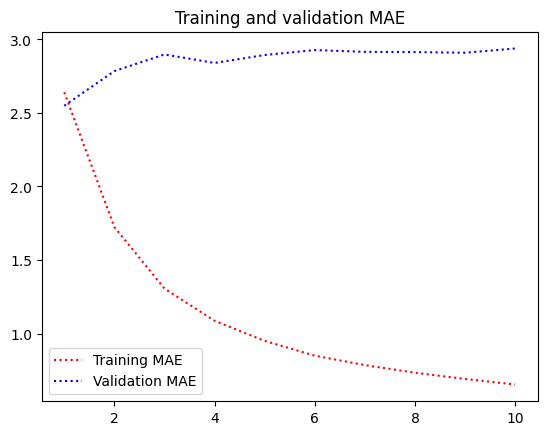

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()

# Update the color to red and line style to a dotted line for training MAE
plt.plot(epochs, loss, "r:", label="Training MAE")

# Update the color to blue and line style to a dotted line for validation MAE
plt.plot(epochs, val_loss, "b:", label="Validation MAE")

plt.title("Training and validation MAE")
plt.legend()
plt.show()

**LSTM - dropout-regularized, stacked model**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(8, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.LSTM(8, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_LSTM_dropout.st",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_stacked_LSTM_dropout.st")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 538s 652ms/step - loss: 70.8300 - mae: 6.4436 - val_loss: 35.0430 - val_mae: 4.3715
Epoch 2/10
819/819 [==============================] - 529s 646ms/step - loss: 32.1669 - mae: 4.2365 - val_loss: 13.3818 - val_mae: 2.7223
Epoch 3/10
819/819 [==============================] - 540s 659ms/step - loss: 24.6043 - mae: 3.7576 - val_loss: 10.5627 - val_mae: 2.4776
Epoch 4/10
819/819 [==============================] - 537s 655ms/step - loss: 22.5156 - mae: 3.5952 - val_loss: 10.0986 - val_mae: 2.4408
Epoch 5/10
819/819 [==============================] - 527s 644ms/step - loss: 21.1766 - mae: 3.4906 - val_loss: 9.5768 - val_mae: 2.3858
Epoch 6/10
819/819 [==============================] - 524s 639ms/step - loss: 20.1218 - mae: 3.4064 - val_loss: 9.4267 - val_mae: 2.3698
Epoch 7/10
819/819 [==============================] - 530s 647ms/step - loss: 19.3057 - mae: 3.3370 - val_loss: 9.4758 - val_mae: 2.3821
Epoch 8/10
819/819 [=================

405/405 [==============================] - 29s 70ms/step - loss: 10.5393 - mae: 2.5416
Test MAE: 2.54


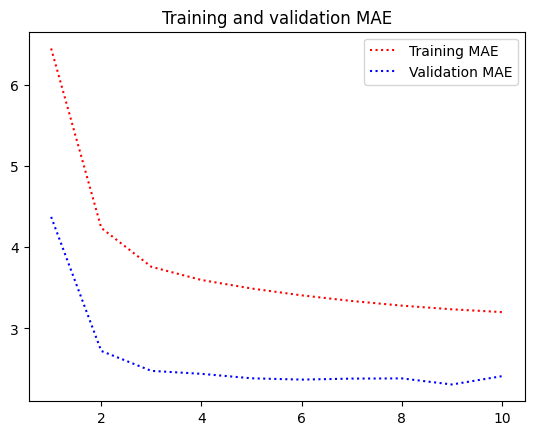

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()

# Update the color to red and line style to a dotted line for training MAE
plt.plot(epochs, loss, "r:", label="Training MAE")

# Update the color to blue and line style to a dotted line for validation MAE
plt.plot(epochs, val_loss, "b:", label="Validation MAE")

plt.title("Training and validation MAE")
plt.legend()
plt.show()

**Bi Directional LSTM**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_bidirec_LSTM.st",
                                    save_best_only=True)
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                     callbacks=callbacks)

model = keras.models.load_model("jena_bidirec_LSTM.st")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 29s 32ms/step - loss: 24.7005 - mae: 3.5851 - val_loss: 10.6722 - val_mae: 2.5303
Epoch 2/10
819/819 [==============================] - 26s 31ms/step - loss: 9.4832 - mae: 2.4015 - val_loss: 9.5475 - val_mae: 2.4071
Epoch 3/10
819/819 [==============================] - 16s 20ms/step - loss: 8.5567 - mae: 2.2820 - val_loss: 9.7748 - val_mae: 2.4444
Epoch 4/10
819/819 [==============================] - 16s 20ms/step - loss: 8.0065 - mae: 2.2093 - val_loss: 10.0253 - val_mae: 2.4710
Epoch 5/10
819/819 [==============================] - 16s 19ms/step - loss: 7.5797 - mae: 2.1536 - val_loss: 9.7985 - val_mae: 2.4441
Epoch 6/10
819/819 [==============================] - 16s 20ms/step - loss: 7.2339 - mae: 2.1016 - val_loss: 10.7006 - val_mae: 2.5421
Epoch 7/10
819/819 [==============================] - 16s 20ms/step - loss: 6.9506 - mae: 2.0596 - val_loss: 10.4115 - val_mae: 2.5082
Epoch 8/10
819/819 [==============================] - 16s

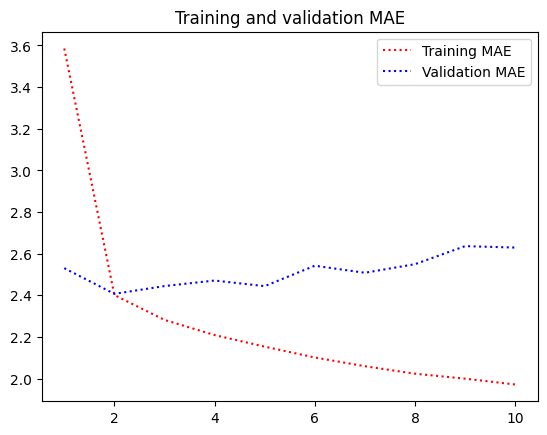

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()

# Update the color to red and line style to a dotted line for training MAE
plt.plot(epochs, loss, "r:", label="Training MAE")

# Update the color to blue and line style to a dotted line for validation MAE
plt.plot(epochs, val_loss, "b:", label="Validation MAE")

plt.title("Training and validation MAE")
plt.legend()
plt.show()

**1D Convnets and LSTM togther**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(64, 3, activation='relu')(inputs)
x = layers.MaxPooling1D(3)(x)
x = layers.Conv1D(128, 3, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Reshape((-1, 128))(x)  # Reshape the data to be 3D
x = layers.LSTM(16)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_Conv_LSTM.st", save_best_only=True)
]

history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

model = keras.models.load_model("jena_Conv_LSTM.st")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 19s 21ms/step - loss: 50.0698 - mae: 5.2951 - val_loss: 27.9118 - val_mae: 4.1339
Epoch 2/10
819/819 [==============================] - 18s 22ms/step - loss: 18.0295 - mae: 3.2657 - val_loss: 21.7121 - val_mae: 3.6979
Epoch 3/10
819/819 [==============================] - 14s 17ms/step - loss: 14.7811 - mae: 2.9728 - val_loss: 22.3197 - val_mae: 3.7212
Epoch 4/10
819/819 [==============================] - 14s 17ms/step - loss: 13.0615 - mae: 2.7884 - val_loss: 27.4163 - val_mae: 4.0884
Epoch 5/10
819/819 [==============================] - 14s 16ms/step - loss: 11.9344 - mae: 2.6590 - val_loss: 22.5451 - val_mae: 3.7690
Epoch 6/10
819/819 [==============================] - 14s 17ms/step - loss: 11.0296 - mae: 2.5493 - val_loss: 22.2988 - val_mae: 3.7842
Epoch 7/10
819/819 [==============================] - 14s 17ms/step - loss: 10.3041 - mae: 2.4591 - val_loss: 23.2600 - val_mae: 3.8458
Epoch 8/10
819/819 [============================

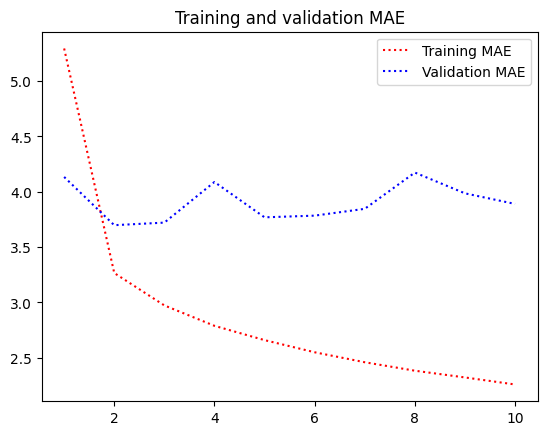

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()

# Update the color to red and line style to a dotted line for training MAE
plt.plot(epochs, loss, "r:", label="Training MAE")

# Update the color to blue and line style to a dotted line for validation MAE
plt.plot(epochs, val_loss, "b:", label="Validation MAE")

plt.title("Training and validation MAE")
plt.legend()
plt.show()


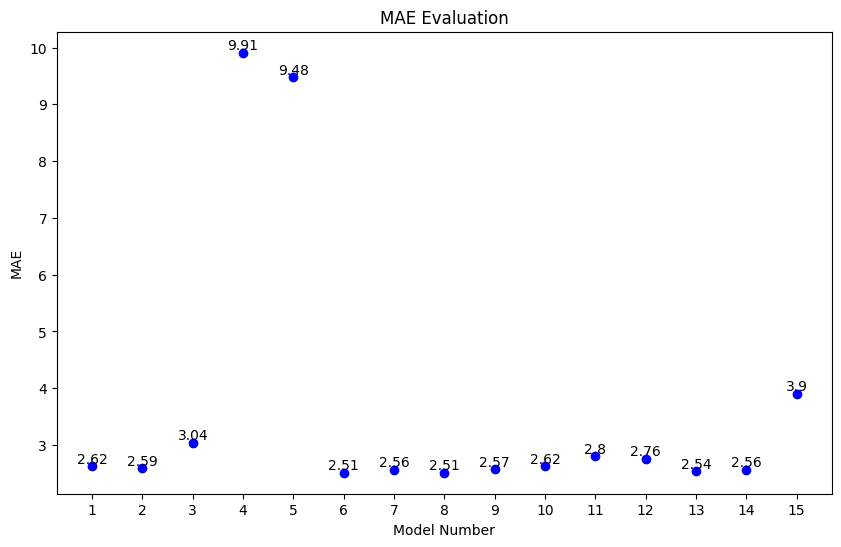

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Models = ("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15")
Mae = (2.62,2.59,3.04,9.91,9.48,2.51,2.56,2.51,2.57,2.62,2.80,2.76,2.54,2.56,3.90)

# MAE Evaluation
plt.figure(figsize=(10, 6))
plt.scatter(Models, Mae, color="blue")
plt.title("MAE Evaluation")
plt.xlabel("Model Number")
plt.ylabel("MAE")

for (xi, yi) in zip(Models,Mae):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()
